In [1]:
from core import Core
from dataset import Dataset
from sklearn import metrics
from sklearn import tree

In [2]:
# load the csv files into a dataset object
ds = Dataset('./M06/Predicted Texts/')

Loading cores from directory ./M06/Predicted Texts/ ...


Synchronizing cell types over all cores in dataset...


In [3]:
# if any previous biomarker calculations are present, load it into the dataset object
ds.load()

In [4]:
# get a list of all the biomarkers that already have been calculated
# omit the markers containing the cell type "Others"
for marker in ds.biomarkers.keys():
    if not "Others" in marker:
        print(marker)

Lymphocyte_average_area_px^2
Macrophage_average_area_px^2
Neutrophil_average_area_px^2
Tumor_average_area_px^2
Lymphocyte_density_mu^2
Macrophage_density_mu^2
Neutrophil_density_mu^2
Tumor_density_mu^2
Entropy of cellullar neighbourhood distribution for 8 neighbourhoods
Entropy of cellular neighbourhood distribution of Lymphocyte for 8 neighbourhoods
Entropy of cellular neighbourhood distribution of Macrophage for 8 neighbourhoods
Entropy of cellular neighbourhood distribution of Neutrophil for 8 neighbourhoods
Entropy of cellular neighbourhood distribution of Tumor for 8 neighbourhoods
Lymphocyte_fraction
Macrophage_fraction
Neutrophil_fraction
Tumor_fraction
Fraction of cellular neighbourhoods 0 / 8
Fraction of cellular neighbourhoods 1 / 8
Fraction of cellular neighbourhoods 2 / 8
Fraction of cellular neighbourhoods 3 / 8
Fraction of cellular neighbourhoods 4 / 8
Fraction of cellular neighbourhoods 5 / 8
Fraction of cellular neighbourhoods 6 / 8
Fraction of cellular neighbourhoods 7

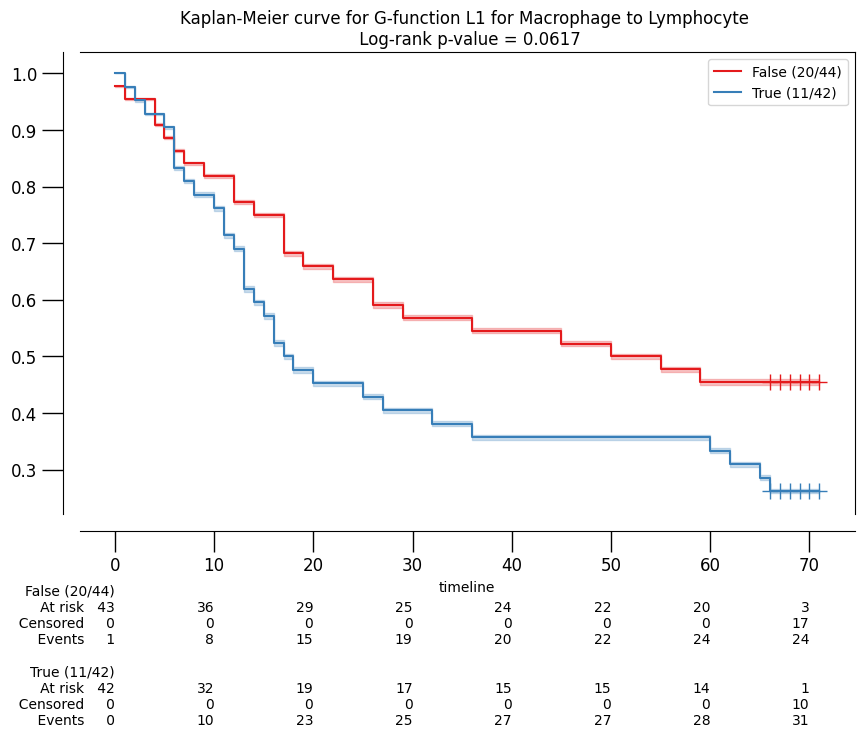

In [5]:
# plot a Kaplan-Meier curve for a biomarker
ds.kaplan_meier("G-function L1 for Macrophage to Lymphocyte")

In [6]:
# Get list of all biomarkers that have a cox regression p-value of less than 0.1
count = 0
for key, value in ds.cox_p.items():
    if value < 0.1 and not "Others" in key:
        print(key + ", p-value: " + str(value))
        count += 1
print(count)

Lymphocyte_average_area_px^2, p-value: 0.03285638952929696
Neutrophil_average_area_px^2, p-value: 0.04708469031179319
Neutrophil_density_mu^2, p-value: 0.0783531073046302
Fraction of Lymphocyte that belong to neighbourhood 3 / 8, p-value: 0.02740427417617016
G-function L1 for Lymphocyte to Lymphocyte, p-value: 0.08611584425896372
G-function L1 for Macrophage to Lymphocyte, p-value: 0.03363032104690248
G-function L1 for Macrophage to Tumor, p-value: 0.0701482502130612
G-function L1 for neighbourhood 1 / 8 to neighbourhood 2 / 8, p-value: 0.018639891993943922
G-function L1 for neighbourhood 2 / 8 to neighbourhood 4 / 8, p-value: 0.08114493437193121
G-function L1 for neighbourhood 7 / 8 to neighbourhood 1 / 8, p-value: 0.06348400046929623
G-function L1 for neighbourhood 7 / 8 to neighbourhood 7 / 8, p-value: 0.0467359791905719
G-function L1 for neighbourhood 8 / 8 to neighbourhood 7 / 8, p-value: 0.08019131305420903
K-function L1 for Lymphocyte to Neutrophil, p-value: 0.08840094740921338


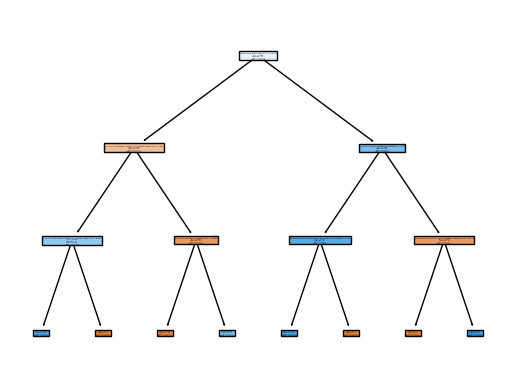

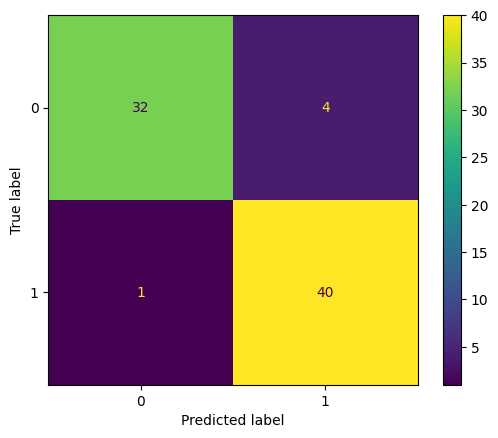

In [10]:
# construct a decision tree with a certain max depth and a survival cutoff
# to create a binary classification task
ds.construct_decision_tree(max_depth=3, survival_cutoff=24)
features, labels, names = ds.get_features()
pred = ds.decision_tree.predict(features)

# print the confusion matrix and the decision tree
cm = metrics.confusion_matrix(labels, pred)
tree.plot_tree(ds.decision_tree, feature_names=names, class_names=['No reponse', 'Response'], filled=True)
metrics.ConfusionMatrixDisplay(cm).plot()